#                                           神经网络完成 dog vs cat 项目
#### 作者: 曾烨烨  
#### 开始时间 : 2018/6/1  
#### 结束时间 :   

In [32]:
# 首先使用命令行的方式加载来自Kaggle的数据
# pip install kaggle,然后添加token到 /root/.kaggle/kaggle.json文件中
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition
!cp /root/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/test.zip test.zip
!cp /root/.kaggle/competitions/dogs-vs-cats-redux-kernels-edition/train.zip train.zip

import os 
if not os.path.exists('train'):
    # 解压训练集和测试集
    !unzip train.zip
    !unzip test.zip

test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
#先加载所有的train数据
import glob
import os
import shutil
import numpy as np

# 加载所有的数组,此处应该有更优雅的实现的
def load_data(path):
    file_names = glob.glob(path + '*.jpg')
    file_targets = []
    for file_name in file_names:
        file_targets.append('dog' in file_name)
    data_files = np.array(file_names)
    data_targets = np.array(file_targets)
    return data_files, data_targets

def rm_rf_and_mkdir(directory_name):
    """删除该目录下所有文件,如果不存在该文件夹,则新建
    :argument directory_name 要处理的文件夹
    """
    if os.path.exists(directory_name):
        shutil.rmtree(directory_name)
    os.mkdir(directory_name)

def create_train_test_set():
    """使用软连接的方式创建验证集和测试集"""
    # 如果bad_images文件夹不存在,那就说明需要
    # 创建test_set  train_set两个文件夹
    if not os.path.exists('bad_images'):
        rm_rf_and_mkdir('train_set')
        rm_rf_and_mkdir('train_set')
        rm_rf_and_mkdir('test_set')
        os.mkdir('train_set/dog')
        os.mkdir('train_set/cat')
        file_names = os.listdir('train')
        # 按照文件名分开它们
        cat_file_names = filter(lambda x: 'cat' in x, file_names)
        dog_file_names = filter(lambda x: 'dog' in x, file_names)

        # 创建训练集
        for file_name in cat_file_names:
            os.symlink('train/' + file_name, 'train_set/cat/' + file_name)
        for file_name in dog_file_names:
            os.symlink('train/' + file_name, 'train_set/dog/' + file_name)
        # 创建测试集
        os.symlink('../test', 'test_set/test')
    else:
        print('已经将图片分门别类了')

In [34]:
# 创建训练集和测试集的软连接
#create_train_test_set()
# 加载所有数据
data_files, data_targets = load_data('train/')
print(data_files[:5])
print(data_targets[:5])

['train/dog.11396.jpg' 'train/dog.12272.jpg' 'train/cat.2974.jpg'
 'train/cat.12354.jpg' 'train/cat.5454.jpg']
[ True  True False False False]


In [35]:
from typing import List, Any, Union

dogs = ['n02085620', 'n02085782', 'n02085936', 'n02086079'
    , 'n02086240', 'n02086646', 'n02086910', 'n02087046'
    , 'n02087394', 'n02088094', 'n02088238', 'n02088364'
    , 'n02088466', 'n02088632', 'n02089078', 'n02089867'
    , 'n02089973', 'n02090379', 'n02090622', 'n02090721'
    , 'n02091032', 'n02091134', 'n02091244', 'n02091467'
    , 'n02091635', 'n02091831', 'n02092002', 'n02092339'
    , 'n02093256', 'n02093428', 'n02093647', 'n02093754'
    , 'n02093859', 'n02093991', 'n02094114', 'n02094258'
    , 'n02094433', 'n02095314', 'n02095570', 'n02095889'
    , 'n02096051', 'n02096177', 'n02096294', 'n02096437'
    , 'n02096585', 'n02097047', 'n02097130', 'n02097209'
    , 'n02097298', 'n02097474', 'n02097658', 'n02098105'
    , 'n02098286', 'n02098413', 'n02099267', 'n02099429'
    , 'n02099601', 'n02099712', 'n02099849', 'n02100236'
    , 'n02100583', 'n02100735', 'n02100877', 'n02101006'
    , 'n02101388', 'n02101556', 'n02102040', 'n02102177'
    , 'n02102318', 'n02102480', 'n02102973', 'n02104029'
    , 'n02104365', 'n02105056', 'n02105162', 'n02105251'
    , 'n02105412', 'n02105505', 'n02105641', 'n02105855'
    , 'n02106030', 'n02106166', 'n02106382', 'n02106550'
    , 'n02106662', 'n02107142', 'n02107312', 'n02107574'
    , 'n02107683', 'n02107908', 'n02108000', 'n02108089'
    , 'n02108422', 'n02108551', 'n02108915', 'n02109047'
    , 'n02109525', 'n02109961', 'n02110063', 'n02110185'
    , 'n02110341', 'n02110627', 'n02110806', 'n02110958'
    , 'n02111129', 'n02111277', 'n02111500', 'n02111889'
    , 'n02112018', 'n02112137', 'n02112350', 'n02112706'
    , 'n02113023', 'n02113186', 'n02113624', 'n02113712'
    , 'n02113799', 'n02113978']  # type: List[Union[str, Any]]

cats = ['n02123045', 'n02123159', 'n02123394', 'n02123597',
        'n02124075', 'n02125311', 'n02127052']

# [上面数据来自知乎上某人关于ImageNet预测的品种的猫狗的分别可能](https://zhuanlan.zhihu.com/p/34068451)


In [45]:
# 使用多个模型来清除不正常的数据
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inception_resnet
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import decode_predictions,preprocess_input
from keras.preprocessing import image

def clean_up_dataset(model, threshold=50, target_size=(224, 224), preprocess_function=preprocess_input, data_files=data_files,
                     data_targets=data_targets):
    """使用特定的模型来预测图片是否属于猫狗"""
    # 保存输出不正常的路径
    path_list = []
    for i in range(len(data_files)):
        file_name = data_files[i]
        is_dog = data_targets[i]
        img = image.load_img(file_name, target_size=target_size)

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_function(x)

        # 进行预测
        prediction = model.predict(x)
        result = np.array(decode_predictions(prediction, top=threshold)[0])
        # 只留下预测的图片的实物编码即可
        result = result[:, 0]

        # 只要是猫狗的判断正确,那么就不添加到list里了
        if is_dog:
            # 预测的种类是否存在dogs中
            if np.in1d(result, dogs).sum() > 0:
                continue
        else:
            # 预测的种类是否存在cats中
            if np.in1d(result, cats).sum() > 0:
                continue

        # 展示坏的图片
        path_list.append(file_name)

    return path_list


In [46]:
import os

def bad_images_handled():
    """判断异常图片是否已经被处理"""
    return os.path.exists('bad_images')

In [47]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_resnet

# 使用ResNet50来检验异常值
unnormal_found_by_resnet50 = []
if not bad_images_handled():
    model = ResNet50(weights='imagenet')
    unnormal_found_by_resnet50 = clean_up_dataset(model, threshold=50, preprocess_function=preprocess_resnet)
    print(unnormal_found_by_resnet50[:10])
    print(len(unnormal_found_by_resnet50))

['train/cat.11184.jpg', 'train/cat.9983.jpg', 'train/cat.10863.jpg', 'train/cat.5355.jpg', 'train/cat.1139.jpg', 'train/cat.4338.jpg', 'train/cat.252.jpg', 'train/cat.12227.jpg', 'train/cat.7296.jpg', 'train/dog.4367.jpg']
164


In [48]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as preprocess_inception_restnet

# 使用InceptionResNetV2来检验异常值
unnormal_found_by_inceptionrestnetv2 = []
if not bad_images_handled():
    model_inception_resnet = InceptionResNetV2(include_top=True, weights='imagenet')
    unnormal_found_by_inceptionrestnetv2 = clean_up_dataset(model_inception_resnet, threshold=50,
                                     preprocess_function=preprocess_inception_restnet)
    print(unnormal_found_by_inceptionrestnetv2[:10])
    print(len(unnormal_found_by_inceptionrestnetv2))

['train/cat.11184.jpg', 'train/cat.9983.jpg', 'train/cat.7668.jpg', 'train/cat.5355.jpg', 'train/cat.4338.jpg', 'train/cat.2433.jpg', 'train/cat.252.jpg', 'train/dog.4367.jpg', 'train/cat.503.jpg', 'train/cat.3868.jpg']
102


In [52]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as preprocess_inception

# 使用IInceptionV3来检验异常值
unnormal_found_by_inceptionv3 = []
if not bad_images_handled():
    model_inception = InceptionV3(include_top=True, weights='imagenet')
    unnormal_found_by_inceptionv3 = clean_up_dataset(model_inception, threshold=50, preprocess_function=preprocess_inception)
    print(unnormal_found_by_inceptionv3[:10])
    print(len(unnormal_found_by_inceptionv3))

['train/cat.11184.jpg', 'train/cat.3738.jpg', 'train/cat.2162.jpg', 'train/cat.9983.jpg', 'train/cat.10863.jpg', 'train/cat.10121.jpg', 'train/cat.5355.jpg', 'train/cat.4338.jpg', 'train/cat.2433.jpg', 'train/cat.12227.jpg']
124


In [53]:
import random

import matplotlib.pyplot as plt

# 批量显示图片的方法,每行显示4张
def plot_gallery(image_paths, n_col=4, random_size=None):
    """Helper function to plot a gallery of portraits
    :argument image_paths 所有图片的路径
    :argument random_size 是否从中随机抽取几张图片
    :argument n_col 每行显示的图片
    """
    if random_size:
        image_paths = random.sample(image_paths, random_size)

    n_row = len(image_paths) / n_col + 1
    plt.figure(figsize=(4 * n_col, 4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(len(image_paths)):
        plt.subplot(n_row, n_col, i + 1)
        picture = mpimg.imread(image_paths[i])
        plt.imshow(picture, cmap=plt.cm.gray)
        plt.title(image_paths[i], size=14)
        plt.xticks(())
        plt.yticks(())

    plt.show()


3个模型检查出的共同的异常照片数量为 49


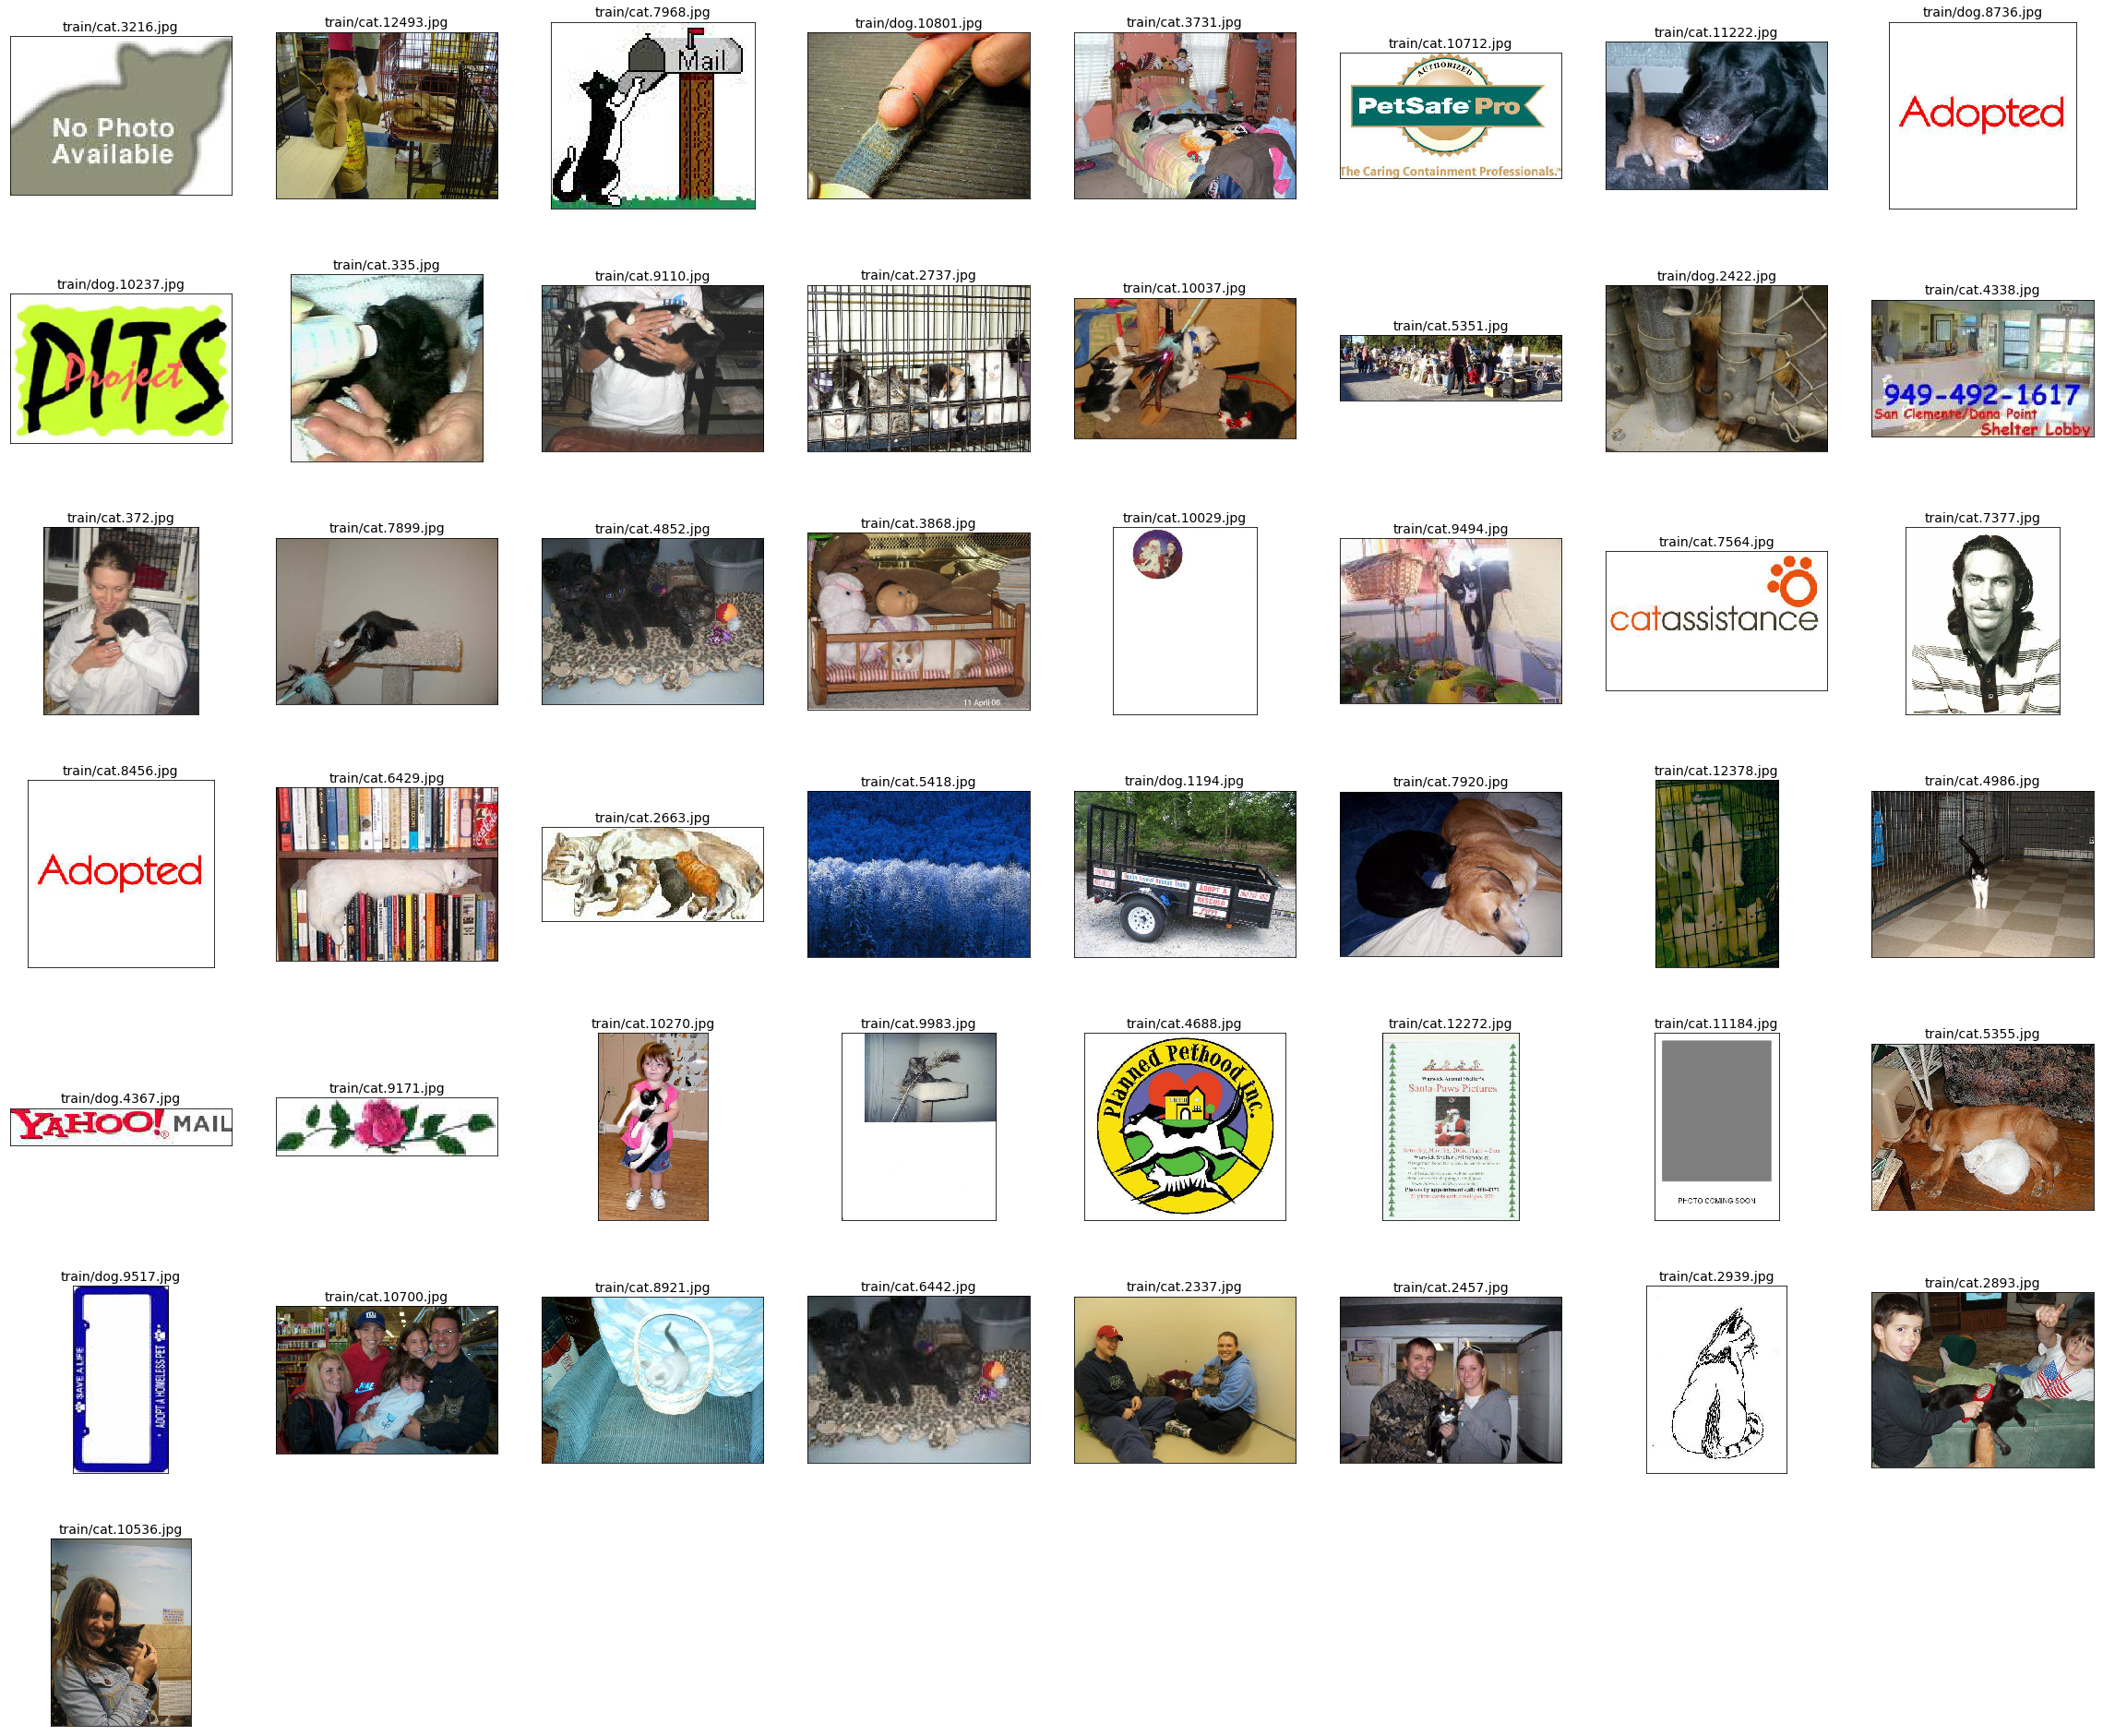

In [56]:
# 找出这几个模型找出的异常照片的交集
shared_pictures = set(unnormal_found_by_resnet50).intersection(set(unnormal_found_by_inceptionrestnetv2)).intersection(set(unnormal_found_by_inceptionv3))
print('3个模型检查出的共同的异常照片数量为',len(shared_pictures))
# 展示所有的异常图片
plot_gallery(list(shared_pictures),8)

In [58]:
# 得到单独的有问题的,单个模型检测出来的
alone_in_list_rest50 = list(set(unnormal_found_by_resnet50).difference(set(shared_pictures)))
alone_in_list_inception_rest = list(set(unnormal_found_by_inceptionrestnetv2).difference(set(shared_pictures)))
alone_in_list_inceptionv3 = list(set(unnormal_found_by_inceptionv3).difference(set(shared_pictures)))

# 仅该模型检测出来的异常值
print('Bad picture  found by ResNet50 :', len(alone_in_list_rest50))
print('Bad picture  found by InceptionResNetV2 :', len(alone_in_list_inception_rest))
print('Bad picture  found by InceptionV3 : ', len(alone_in_list_inceptionv3))

# 全集
all_in_list = list(set(unnormal_found_by_resnet50).union(set(unnormal_found_by_inceptionrestnetv2)).union(set(alone_in_list_inceptionv3)))
print('All bad picture  found by models :',len(all_in_list))

Bad picture  found by ResNet50 : 115
Bad picture  found by InceptionResNetV2 : 53
Bad picture  found by InceptionV3 :  75
All bad picture  found by models : 237


#### 毫无疑问,这三个模型共同检测出来的异常值是必需要处理的.  
现在展示模型单独检测出来的异常值

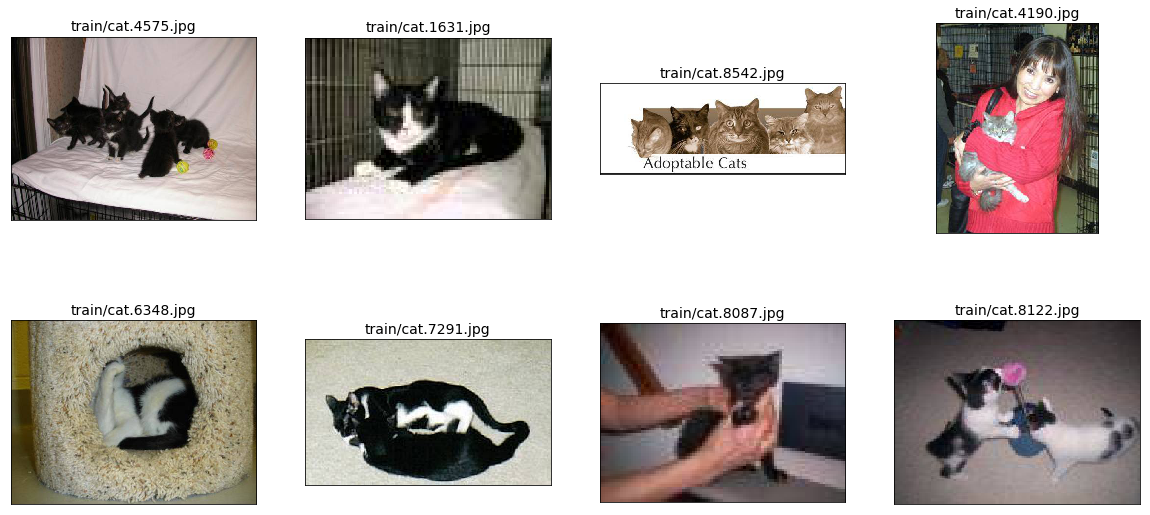

In [60]:
# 展示ResNet模型单独检测出来的异常值,随机挑选8张
plot_gallery(list(alone_in_list_rest50),random_size=8)

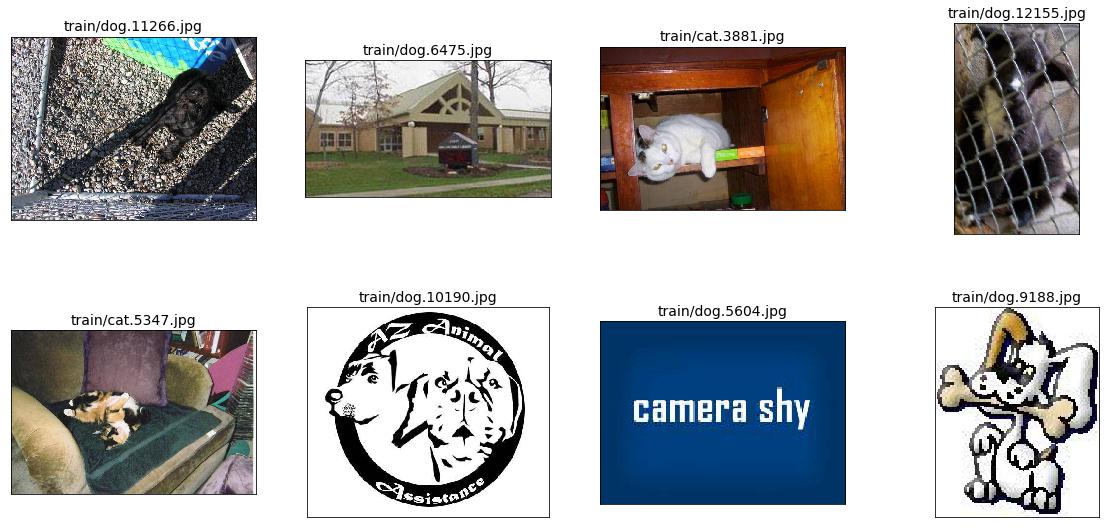

In [61]:
# 展示InceptionResNetV2模型单独检测出来的异常值,随机挑选8张
plot_gallery(list(alone_in_list_inception_rest),random_size=8)

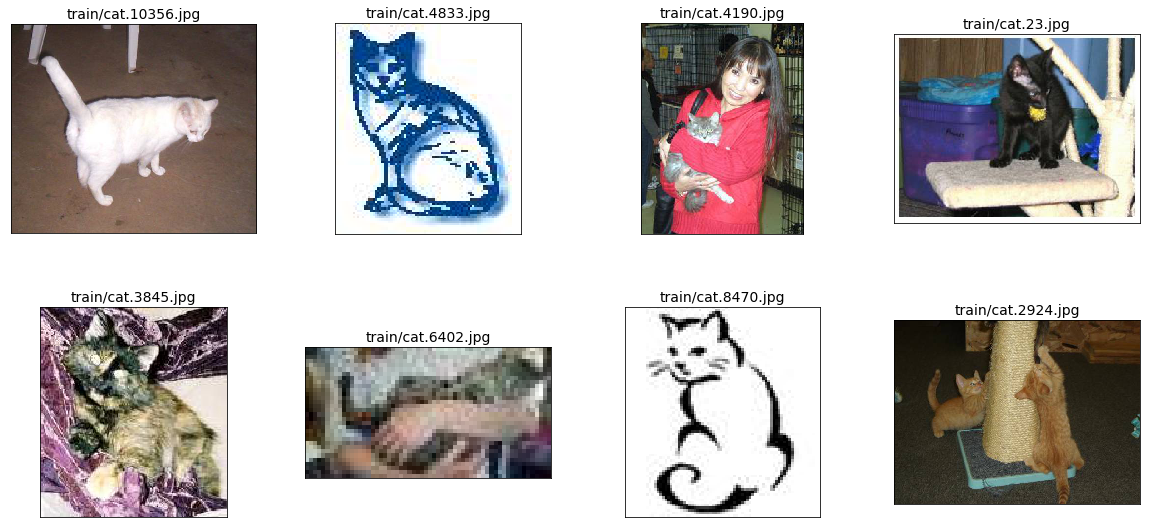

In [62]:
# 展示InceptionV3模型单独检测出来的异常值,随机挑选8张
plot_gallery(list(alone_in_list_inceptionv3),random_size=8)

In [70]:
import numpy as np
import cv2

def get_size_of_pictures(image_paths):
    """得到所有照片的分辨率"""
    x=[]
    y=[]
    for path in image_paths:
        picture=cv2.imread(path)
        sp = picture.shape
        # 高度
        y.append(sp[0])
        # 宽度
        x.append(sp[1])
    return np.array(x),np.array(y)

In [76]:
import matplotlib  
import matplotlib.pyplot as plt  

def show_size_of_pictures(X,Y):
    """将展示照片尺寸,以散点图的方式"""
    fig, ax = plt.subplots()
    ax.plot(X,Y,'o')
    ax.set_title('Resolution of all pictrues')
    plt.show()

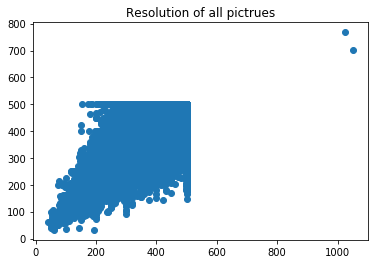

In [78]:
# 展示所有图片分辨率的分布
X,Y=get_size_of_pictures(data_files)
show_size_of_pictures(X,Y)

In [79]:
# 此时我得到了200张异常的图片
# 我将新建一个文件夹,并把异常数据放进去
# [参考](https://blog.csdn.net/lm409/article/details/75452306)
import os
import shutil

def move_image_files(image_paths, dst_path):
    '''将指定list的文件移动到指定目录'''
    #去首位空格
    dst_path = dst_path.strip()
    #去除尾部反斜杠
    dst_path = dst_path.rstrip("\\")
    success_count = 0
    #不存在目录就创建目录
    dst_exists = os.path.exists(dst_path)
    if not dst_exists:
        os.mkdir(dst_path)
    if image_paths == None:
        print('No image path in it')
        return 0
    for image_path in image_paths:
        #得到当前的文件名
        basename = os.path.basename(image_path)
        #得到全路径
        full_path = os.path.abspath(image_path)
        #如果文件路径不存在,那么就跳过
        if not os.path.exists(full_path):
            continue
        #拼接成目的文件路径,
        #注意dst_path是不能边遍历边改变的,否则找不到路径
        traget_path = os.path.join(dst_path, basename)
        #移动到指定的文件夹
        shutil.move(full_path, traget_path)
        success_count += 1

    #返回成功次数
    return success_count


In [81]:
import os 
 
# 那就开始移动吧
if not os.path.exists('bad_images'):
    success_count=move_image_files(shared_pictures,"./bad_images")
    print(success_count)

In [82]:
import glob

# 接下来是将猫狗分开移动到指定的文件夹了
# 注意路径,不能有一个标点符号的错误

def move_files_by_target():
    '''将猫狗图片按照指定的target分开'''
    file_paths= glob.glob('./train/' + '*.jpg') 
    #如果是0,表明图片已经处理好了,就不需要再处理了
    #直接return
    if len(file_paths)==0:
        return

    cat_dir='./train_set/cat'
    dog_dir='./train_set/dog'
    
    #如果不存在猫狗文件夹,那么就创建
    if not os.path.exists(cat_dir):
        os.makedirs(cat_dir)
    if not os.path.exists(dog_dir):
        os.makedirs(dog_dir)
        
    #将猫狗文件放到不同的路径
    cat_file_paths=[x for x in file_paths if 'cat'  in x]
    dog_file_paths=[x for x in file_paths if 'dog'  in x]
    
    #按照路径移动文件
    count_cat=move_image_files(cat_file_paths,cat_dir)
    count_dog=move_image_files(dog_file_paths,dog_dir)
    
    return count_cat,count_dog

In [84]:
import os
# 开始移动猫狗图片到指定的文件夹吧
if not os.path.exists('train_set/dog'):
    count_cat,count_dog=move_files_by_target()
    print(count_cat,count_dog)

12458 12493


In [85]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

# 加载数据的方法,将提取所有的文件路径和标签
def load_dataset(path):
    data = load_files(path)
    data_files = np.array(data['filenames'])
    data_targets = np.array(data['target'])
    return data_files,data_targets

In [87]:
# 加载所有的处理过的猫狗数据
train_files,train_targets=load_dataset('train_set')
print(train_files[0],train_targets[0])

train_set/dog/dog.5617.jpg 1


In [ ]:
#注意,不能直接加载数据集然后再分割,因为这样很占用内存
from sklearn.model_selection import train_test_split

X=train_files
Y=train_targets
x_train,x_valid,y_train,y_valid=train_test_split(X,Y,test_size=0.2,random_state=8888)

In [86]:
from keras import Model
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D

base_model = InceptionResNetV2(weights='imagenet', include_top=False)
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.2)(x)
# 添加一个分类器，我们有2个类
predictions = Dense(1, activation='sigmoid')(x)

# 构建我们需要训练的完整模型
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
for i, layer in enumerate(model.layers):
    print(i, layer.name)

# 输出模型的样式
model.summary()


0 input_7
1 conv2d_907
2 batch_normalization_907
3 activation_956
4 conv2d_908
5 batch_normalization_908
6 activation_957
7 conv2d_909
8 batch_normalization_909
9 activation_958
10 max_pooling2d_22
11 conv2d_910
12 batch_normalization_910
13 activation_959
14 conv2d_911
15 batch_normalization_911
16 activation_960
17 max_pooling2d_23
18 conv2d_915
19 batch_normalization_915
20 activation_964
21 conv2d_913
22 conv2d_916
23 batch_normalization_913
24 batch_normalization_916
25 activation_962
26 activation_965
27 average_pooling2d_14
28 conv2d_912
29 conv2d_914
30 conv2d_917
31 conv2d_918
32 batch_normalization_912
33 batch_normalization_914
34 batch_normalization_917
35 batch_normalization_918
36 activation_961
37 activation_963
38 activation_966
39 activation_967
40 mixed_5b
41 conv2d_922
42 batch_normalization_922
43 activation_971
44 conv2d_920
45 conv2d_923
46 batch_normalization_920
47 batch_normalization_923
48 activation_969
49 activation_972
50 conv2d_919
51 conv2d_921
52 conv2d_

__________________________________________________________________________________________________
block17_4_conv (Conv2D)         (None, None, None, 1 418880      block17_4_mixed[0][0]            
__________________________________________________________________________________________________
block17_4 (Lambda)              (None, None, None, 1 0           block17_3_ac[0][0]               
                                                                 block17_4_conv[0][0]             
__________________________________________________________________________________________________
block17_4_ac (Activation)       (None, None, None, 1 0           block17_4[0][0]                  
__________________________________________________________________________________________________
conv2d_1000 (Conv2D)            (None, None, None, 1 139264      block17_4_ac[0][0]               
__________________________________________________________________________________________________
batch_norm

In [91]:
#展示模型,因为要安装额外软件,所以linux就注释掉了
# from keras.utils import plot_model
# pip install pydot
# pip install pydot-ng
# pip install graphviz 
# 参考https://blog.csdn.net/u011311291/article/details/80298563
# https://packages.ubuntu.com/search?keywords=graphviz&searchon=names
# plot_model(model, to_file='model.png',show_shapes=True)

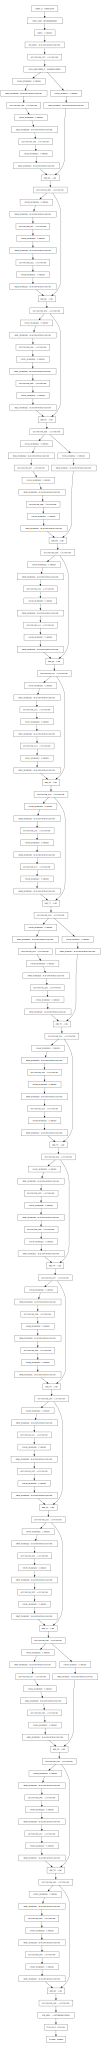

In [92]:
#另一种可视化模型的方法
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [83]:
#接下来的处理方式是将所有的图片都处理成向量
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import preprocess_input as ir_preprocess_input
from tqdm import tqdm

##pip install  tqdm
#注意要安装tqdm
def path_to_tensor(image_path,target_size=(299,299)):
    '''将图片转换为tensor向量'''
    img=image.load_img(image_path,target_size=target_size)
    x=image.img_to_array(img)
    x=ir_preprocess_input(x)
    return np.expand_dims(x,axis=0)

def paths_to_tensor(image_paths):
    '''批量将图片转换为tensor'''
    list_of_tensor=[path_to_tensor(image_path) for image_path in tqdm(image_paths)]
    return np.vstack(list_of_tensor)
    

In [ ]:
#训练模型看看
from keras.callbacks import ModelCheckpoint
import os
###设置训练模型的epochs的数量
epochs = 30
batch_size=50
check_point_filepath='./saved_models/weights.best.from_scratch_adam.hdf5'
saved_model_path='./saved_models'

#文件夹不存在,就创建文件夹
if not os.path.exists(saved_model_path):
    os.mkdir()
    
####设置检查点
checkpointer = ModelCheckpoint(filepath=check_point_filepath, verbose=1, save_best_only=True)

#设置回调
call_back=[checkpointer]

#加载数据
x_train_data=paths_to_tensor(x_train)
x_valid_data=paths_to_tensor(x_valid)

 48%|████▊     | 9507/19868 [00:58<01:03, 163.13it/s]

In [88]:
#开始训练
epochs=10
history= model.fit(x_train_data,y_train,validation_data=(x_valid_data,y_valid),epochs=epochs,batch_size=batch_size,callbacks=call_back)

Train on 19868 samples, validate on 4967 samples
Epoch 1/10
19868/19868 [==============================] - 130s 7ms/step - loss: 0.2036 - acc: 0.9267 - val_loss: 0.0537 - val_acc: 0.9815

Epoch 00001: val_loss improved from inf to 0.05369, saving model to ./saved_models/weights.best.from_scratch_adam.hdf5


KeyboardInterrupt: 

In [84]:
#展示Accuracy数据
def show_acc(history):
    print(history.history.keys())
    figure=plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accucary')
    plt.xlabel('accuracy')
    plt.ylabel('epoch')
    #注意!
    plt.legend(['train','valid'],loc='upper left')
    figure.savefig('performance_acc.png')
    

#展示Loss数据  
def show_loss(history):
    print(history.history.keys())
    figure=plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Loss')
    plt.ylabel('epoch')
    #注意!
    plt.legend(['train','valid'],loc='upper left')
    figure.savefig('performance_loss.png')

dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])
dict_keys(['acc', 'val_loss', 'val_acc', 'loss'])


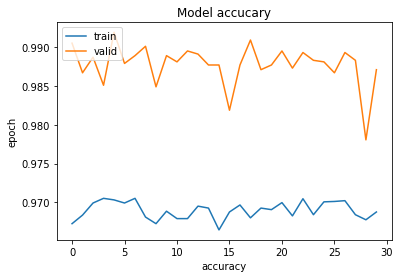

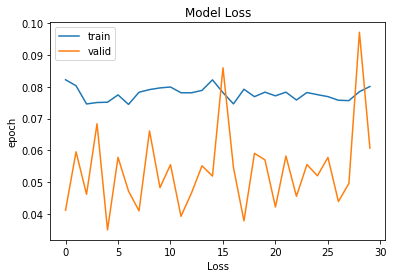

In [85]:
# # show_history(history)

# fig = plt.figure()
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='lower left')

# fig.savefig('performance.png')
#展示训练后的数据
show_acc(history)
show_loss(history)

#### 目前遭遇了一个严重问题,在使用数据集5000,epoch=10,batch_size=50的时候,验证集的val_loss:保持在8.2847 ,val_acc:固定在0.4860,令人费解.
#### 我做了如下尝试:
* 1.停止训练,检查load_files,得到的数据,图片和target是一一对应的
* 2.减少了训练集大小和epoch和batch_size来加快训练速度
* 3.修改了model compile时使用的损失函数,从accuracy 改成binary_accuracy



#### 经过查找原因,发现是数据集太小,模型无法收敛了导致的
#### 解决方案:
* 使用云服务器,有aws和gcp等几个可以选择,我使用gcp继续进行模型的训练 

#### 在经过训练后,我又发现了上次类似的问题,验证集数据准确率只有0.51左右.最先考虑的情况是epoch太少,所以选择10-->30,发现作用不大
#### 问题原因:
* 数据集未经过预处理,且预处理的方法是InceptionResNet50独有的,这点需要注意


In [ ]:
# 经过训练.发现上面两图中的Loss在epoch=5的时候就到达了最大.Accurcy差不多是最高的,所以判断epoch<10内模型就应该收敛了,于是重新训练
# 并且将输入尺寸从224 * 224  改成模型默认的299 * 299 希望成绩变好
epochs=10
history= model.fit(x_train_data,y_train,validation_data=(x_valid_data,y_valid),epochs=epochs,batch_size=batch_size,callbacks=call_back)

In [ ]:
# 加载权重,进行fine-tune
model.load_weights(check_point_filepath)
# 记得先编译
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])